# Finding an image window from main image

In [32]:
import numpy as np
import skimage.io as sio
import skimage.transform as st
import skimage.util as su
import skimage.draw as sdr

from SpiralGen import get_spiral

### Loading a sample of 4x 10x and 40x images

In [33]:
img_4x = su.img_as_float(sio.imread(r"T 26A-22 ductal CA/20220402091557029.tif"))
img_10x = su.img_as_float(sio.imread(r"T 26A-22 ductal CA/20220402091730689.tif"))
img_40x = su.img_as_float(sio.imread(r"T 26A-22 ductal CA/20220402091841778.tif"))

0.7284694138284002 0.7823995208679073


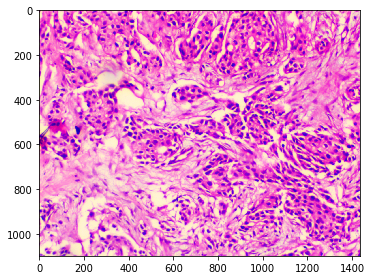

In [34]:
new_img_10x = st.rescale(img_10x, 1/2.5, channel_axis=2)
sio.imshow(new_img_10x)

print(new_img_10x.mean(), img_4x.mean())

### We try to find the location of the scaled down 10x on the 4x

In [51]:
def find_location(main_image: np.ndarray, window_image: np.ndarray, start_x: int = None, start_y: int = None, r = 50) -> tuple:
    main_image_height = main_image.shape[0]
    main_image_width = main_image.shape[1]
    window_image_height = window_image.shape[0]
    window_image_width = window_image.shape[1]

    if start_x == None:
        start_x = main_image_height // 2
    if start_y == None:
        start_y = main_image_width // 2

    if (main_image_width > 512):
        start_x, start_y = find_location(
            st.rescale(main_image, 0.5, channel_axis=2),
            st.rescale(window_image, 0.5, channel_axis=2),
            start_x, start_y, r=0.5
        )

    min_diff: float = 999999999
    min_coord = 0,0
    print(start_x, start_y)
    spiral: list = get_spiral(start_x, start_y, step_end=r)
    # print(spiral)
    for x, y in spiral:
    # for x in range(1200,1500,5):
    #     for y in range(1500,1900,5):
        img_slice = main_image[
            x - (window_image_height//2): x + (window_image_height//2)+1,
            y - (window_image_width//2): y + (window_image_width//2)
        ]
        img = np.abs(img_slice - window_image) 
        new_mean =  np.sum(img)
        # sio.imsave("tests//diff.jpg", img)
        # sio.imsave("tests//diffM.jpg", img_slice)
        if new_mean < min_diff:
            #print(new_mean)
            min_diff = new_mean
            sio.imsave(f"tests//{main_image_height}{main_image_width}{x}{y}.jpg", img)
            # sio.imsave("tests//bestdiffM.jpg", img_slice)
            min_coord = x, y
        

    return min_coord

In [52]:
x, y = find_location(img_4x, new_img_10x)

1374 1792


ValueError: operands could not be broadcast together with shapes (0,0,3) (138,179,3) 

In [ ]:
# start = y - (new_img_10x.shape[0]//2) , x - (new_img_10x.shape[1]//2)
# end = y + (new_img_10x.shape[0]//2)+1 , x + (new_img_10x.shape[1]//2)
# rr, cc = sdr.rectangle_perimeter(start, end, shape=img_4x.shape)
# img_4x[rr, cc] = 0,0,0
# sio.imshow(img_4x)
# sio.imsave(r"test.png", img_4x)

In [ ]:
# print(end[0]-start[0], end[1]- start[1])